In [2]:
import pathlib
import geopandas
import geopandas as gpd
import pandas
import numpy
import numpy as np
import pandas as pd

from scipy.stats import truncnorm
from scipy import stats
import seaborn as sns

import random


import matplotlib.pyplot as plt

In [3]:
slope_simulations = pd.read_csv(fr"S:\Bathymetry\version012\neal_slope_001\1_bathy\bathy_analyses\para_slope_neal.csv")
coords = pd.read_csv(fr"S:\Bathymetry\version012\neal_slope_001\1_bathy\bathy_analyses\coord_slope_neal.csv")
depth_simulations = pd.read_csv(fr"S:\Bathymetry\versions010\neal_slope_001\1_bathy\bathy_analyses\depth_slope_neal.csv")
ori_para = pd.read_csv(fr"S:\Bathymetry\versions010\neal_slope_001\1_bathy\bathy_analyses\original_para_slope_mean_2.0km.csv")
ori_depth_bed_wse = pd.read_csv(fr"S:\Bathymetry\versions010\neal_slope_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [4]:
slope_simulations_filter = slope_simulations[:675].copy(deep=True)
coords_filter = coords[:675].copy(deep=True)
depth_simulations_filter = depth_simulations[:675].copy(deep=True)
ori_para_filter = ori_para[:675].copy(deep=True)
ori_depth_bed_wse_filter = ori_depth_bed_wse[:675].copy(deep=True)

In [5]:
slope_simulations_filter_copy = slope_simulations_filter.copy(deep=True)
depth_simulations_filter_copy = depth_simulations_filter.copy(deep=True)
ori_para_filter_copy = ori_para_filter.copy(deep=True)
ori_depth_bed_wse_filter_copy = ori_depth_bed_wse_filter.copy(deep=True)

In [6]:
slope_simulations_filter_copy['mean'] = slope_simulations_filter.mean(axis=1)
slope_simulations_filter_copy['sd'] = slope_simulations_filter.std(axis=1)
slope_simulations_filter_copy['cv'] = slope_simulations_filter.std(axis=1) / slope_simulations_filter.mean(axis=1) * 100

slope_simulations_filter_copy['var'] = slope_simulations_filter.var(axis=1)
slope_simulations_filter_copy['var_to_mean'] = slope_simulations_filter.var(axis=1) / slope_simulations_filter.mean(axis=1) * 100

In [7]:
depth_simulations_filter_copy['mean'] = depth_simulations_filter.mean(axis=1)
depth_simulations_filter_copy['sd'] = depth_simulations_filter.std(axis=1)
depth_simulations_filter_copy['cv'] = depth_simulations_filter.std(axis=1) / depth_simulations_filter.mean(axis=1) * 100

depth_simulations_filter_copy['var'] = depth_simulations_filter.var(axis=1)
depth_simulations_filter_copy['var_to_mean'] = depth_simulations_filter.var(axis=1) / depth_simulations_filter.mean(axis=1) * 100

### Rupp

In [13]:
depth_simulations_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_slope_001\1_bathy\bathy_analyses\depth_slope_rupp.csv")
ori_para_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_slope_001\1_bathy\bathy_analyses\original_para_slope_mean_2.0km.csv")
ori_depth_bed_wse_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_slope_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [14]:
depth_simulations_filter_rupp = depth_simulations_rupp[:675].copy(deep=True)
ori_para_filter_rupp = ori_para_rupp[:675].copy(deep=True)
ori_depth_bed_wse_filter_rupp = ori_depth_bed_wse_rupp[:675].copy(deep=True)

In [15]:
depth_simulations_filter_copy_rupp = depth_simulations_filter_rupp.copy(deep=True)
ori_para_filter_copy_rupp = ori_para_filter_rupp.copy(deep=True)
ori_depth_bed_wse_filter_copy_rupp = ori_depth_bed_wse_filter_rupp.copy(deep=True)

In [16]:
depth_simulations_filter_copy_rupp['mean'] = depth_simulations_filter_rupp.mean(axis=1)
depth_simulations_filter_copy_rupp['sd'] = depth_simulations_filter_rupp.std(axis=1)
depth_simulations_filter_copy_rupp['cv'] = depth_simulations_filter_rupp.std(axis=1) / depth_simulations_filter_rupp.mean(axis=1) * 100

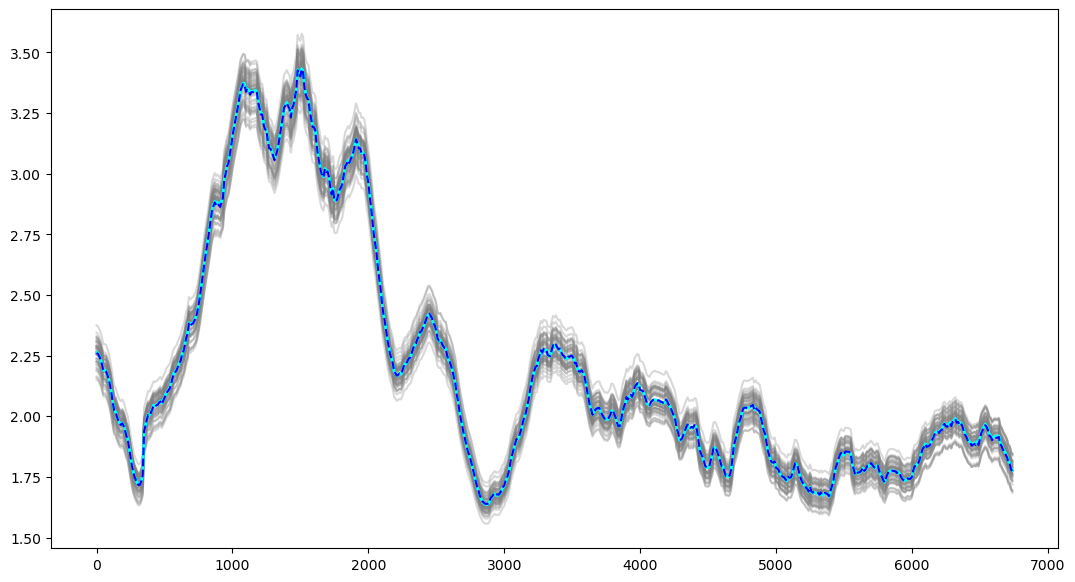

In [8]:
fig, ax = plt.subplots(figsize=(13, 7))


# Original
ax.plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='blue',
    linestyle='--',
    zorder=2
)

# Mean
ax.plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    zorder=1
)




for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.3,
        color='grey',
        zorder=0
    )


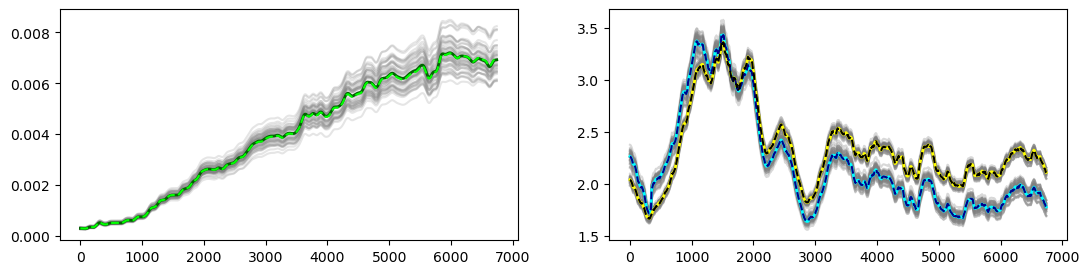

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(13, 3))

# Mean
ax[0].plot(
    coords_filter.distance[:675],
    slope_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='darkgreen',
    linewidth=2,
    zorder=1
)

# Original
ax[0].plot(
    coords_filter.distance[:675],
    ori_para_filter_copy['z'][:675],
    alpha=1,
    color='lime',
    linestyle='--',
    linewidth=1.5,
    zorder=2
)


for i in range(1, 51, 1):
    ax[0].plot(
        coords_filter.distance[:675],
        slope_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.2,
        color='grey',
        zorder=0
    )
    
# ---------------------

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='darkblue',
    linestyle='--',
    zorder=2
)

# Original
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.3,
        color='grey',
        zorder=0
    )
    
# -----------------------

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy_rupp['depth'][:675],
    alpha=1,
    color='black',
    linestyle='--',
    zorder=2
)

# Original
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy_rupp['mean'][:675],
    alpha=1,
    color='yellow',
    linewidth=2,
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy_rupp[f'sim{i}'][:675],
        alpha=0.3,
        color='grey',
        zorder=0
    )

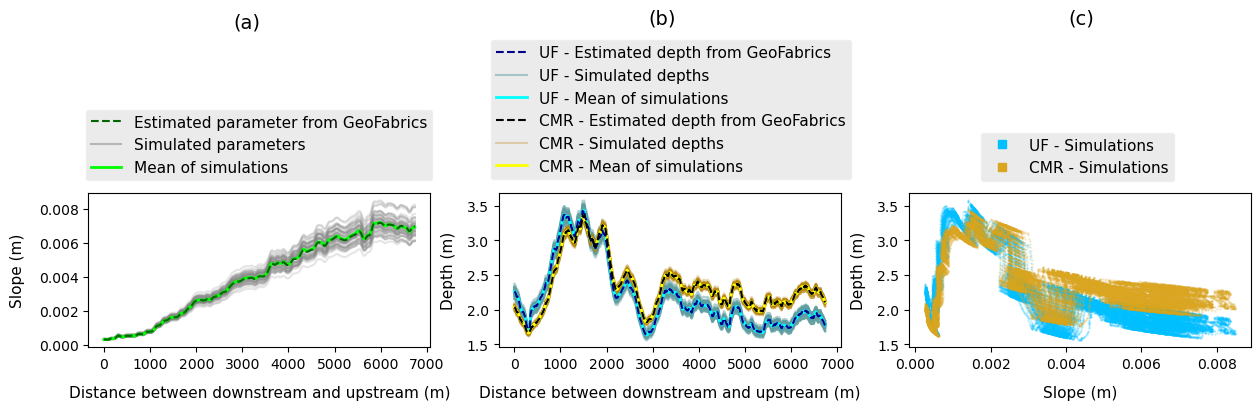

In [332]:
fig, ax = plt.subplots(1, 3, figsize=(15, 2))

fontsize=11
labelpad=10


# Mean
ax[0].plot(
    coords_filter.distance[:675],
    slope_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='lime',
    linewidth=2,
    label='Mean of simulations',
    zorder=1
)

# Original
ax[0].plot(
    coords_filter.distance[:675],
    ori_para_filter_copy['z'][:675],
    alpha=1,
    color='darkgreen',
    linestyle='--',
    label='Estimated parameter from GeoFabrics',
    zorder=2,
)


for i in range(1, 51, 1):
    ax[0].plot(
        coords_filter.distance[:675],
        slope_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5 if i == 1 else 0.2,
        color='grey',
        label="Simulated parameters" if i == 1 else "",
        zorder=0
    )
    
ax[0].set_ylabel('Slope (m)', fontsize=fontsize, labelpad=labelpad)
ax[0].set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
    
# Reorder labels
handles, labels = ax[0].get_legend_handles_labels()

handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]

legend0 = ax[0].legend(handles, labels, prop={"size":fontsize}, markerscale=10, frameon=True, 
             bbox_to_anchor=(1.03, 1.6))

frame0 = legend0.get_frame()
frame0.set_facecolor('0.90')
legend0.get_frame().set_edgecolor('w')
    
# #######################
# ---------------------

# Original
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='darkblue',
    linestyle='--',
    label='UF - Estimated depth from GeoFabrics',
    zorder=2
)

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    label='UF - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5,
        color='cadetblue',
        label='UF - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
# -----------------------

# Original
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy_rupp['depth'][:675],
    alpha=1,
    color='black',
    linestyle='--',
    label='CMR - Estimated depth from GeoFabrics',
    zorder=2
)

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy_rupp['mean'][:675],
    alpha=1,
    color='yellow',
    linewidth=2,
    label='CMR - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy_rupp[f'sim{i}'][:675],
        alpha=0.3,
        color='darkgoldenrod',
        label='CMR - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
ax[1].set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
ax[1].set_ylabel('Depth (m)', fontsize=fontsize, labelpad=labelpad-2)
    
# Reorder labels
handles_depth, labels_depth = ax[1].get_legend_handles_labels()

handles_depth = [handles_depth[0], handles_depth[2], handles_depth[1], handles_depth[3], handles_depth[5], handles_depth[4]]
labels_depth = [labels_depth[0], labels_depth[2], labels_depth[1], labels_depth[3], labels_depth[5], labels_depth[4]]

legend1 = ax[1].legend(handles_depth, labels_depth, prop={"size":fontsize}, markerscale=10, frameon=True, 
             bbox_to_anchor=(1.055, 2.05))

frame1 = legend1.get_frame()
frame1.set_facecolor('0.90')
legend1.get_frame().set_edgecolor('w')
    
# ###################
# -------------------
for i in range(1, 51):
    ax[2].scatter(
        slope_simulations_filter[f'sim{i}'],
        depth_simulations_filter[f'sim{i}'],
        color='deepskyblue',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=0
    )
    
    ax[2].scatter(
        slope_simulations_filter[f'sim{i}'],
        depth_simulations_filter_rupp[f'sim{i}'],
        color='goldenrod',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=1
    )
    
ax[2].set_ylabel('Depth (m)', fontsize=fontsize, labelpad=labelpad-2)
ax[2].set_xlabel('Slope (m)', fontsize=fontsize, labelpad=labelpad)

ax[2].plot([], [], 's', linewidth=1, color='deepskyblue', label='UF - Simulations') # CMR
ax[2].plot([], [], 's', linewidth=1, color='goldenrod', label='CMR - Simulations') # UF

legend2 = ax[2].legend(fontsize=fontsize, frameon=True, bbox_to_anchor=(0.8, 1.45))

frame2 = legend2.get_frame()
frame2.set_facecolor('0.90')
legend2.get_frame().set_edgecolor('w')

ax[0].text(3100, 0.019, '(a)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)
ax[1].text(3200, 6.2, '(b)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)
ax[1].text(12300, 6.2, '(c)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_slope_bathymetry.jpg",
    bbox_inches='tight', dpi=600
)

### Para

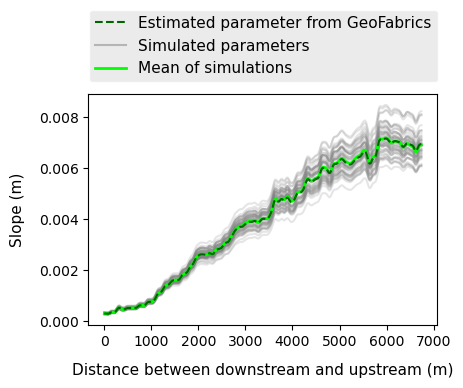

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10


# Mean
ax.plot(
    coords_filter.distance[:675],
    slope_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='lime',
    linewidth=2,
    label='Mean of simulations',
    zorder=1
)

# Original
ax.plot(
    coords_filter.distance[:675],
    ori_para_filter_copy['z'][:675],
    alpha=1,
    color='darkgreen',
    linestyle='--',
    label='Estimated parameter from GeoFabrics',
    zorder=2,
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        slope_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5 if i == 1 else 0.2,
        color='grey',
        label="Simulated parameters" if i == 1 else "",
        zorder=0
    )
    
ax.set_ylabel('Slope (m)', fontsize=fontsize, labelpad=labelpad)
ax.set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
    
# Reorder labels
handles, labels = ax.get_legend_handles_labels()

handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]

legend0 = ax.legend(handles, labels, prop={"size":fontsize}, markerscale=10, frameon=True, 
             bbox_to_anchor=(1.023, 1.4))

frame0 = legend0.get_frame()
frame0.set_facecolor('0.90')
legend0.get_frame().set_edgecolor('w')

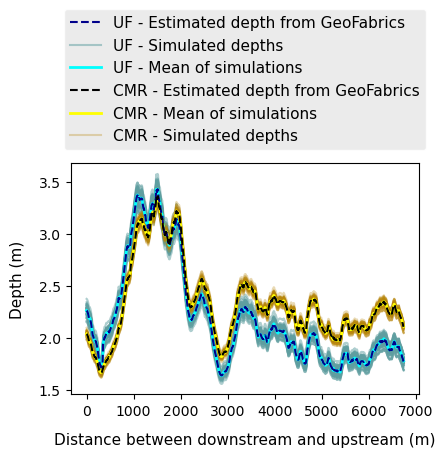

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10

# Mean
ax.plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='darkblue',
    linestyle='--',
    label='UF - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax.plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    label='UF - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5,
        color='cadetblue',
        label='UF - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
# -----------------------

# Mean
ax.plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy_rupp['depth'][:675],
    alpha=1,
    color='black',
    linestyle='--',
    label='CMR - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax.plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy_rupp['mean'][:675],
    alpha=1,
    color='yellow',
    linewidth=2,
    label='CMR - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy_rupp[f'sim{i}'][:675],
        alpha=0.3,
        color='darkgoldenrod',
        label='CMR - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
ax.set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
ax.set_ylabel('Depth (m)', fontsize=fontsize, labelpad=labelpad)
    
# Reorder labels
handles_depth, labels_depth = ax.get_legend_handles_labels()

handles_depth = [handles_depth[0], handles_depth[2], handles_depth[1], handles_depth[3], handles_depth[4], handles_depth[5]]
labels_depth = [labels_depth[0], labels_depth[2], labels_depth[1], labels_depth[3], labels_depth[4], labels_depth[5]]

legend1 = ax.legend(handles_depth, labels_depth, prop={"size":fontsize}, markerscale=10, frameon=True, 
             bbox_to_anchor=(1.04, 1.7))

frame1 = legend1.get_frame()
frame1.set_facecolor('0.90')
legend1.get_frame().set_edgecolor('w')

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_slope_depth_distance.jpg",
    bbox_inches='tight', dpi=600
)

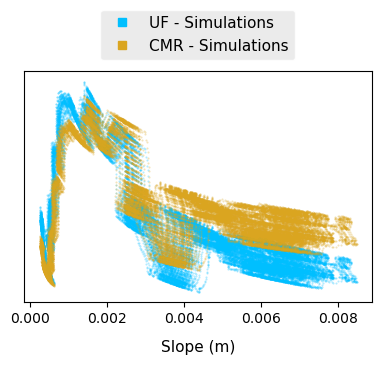

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10

# ###################
# -------------------
for i in range(1, 51):
    ax.scatter(
        slope_simulations_filter[f'sim{i}'],
        depth_simulations_filter[f'sim{i}'],
        color='deepskyblue',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=0
    )
    
    ax.scatter(
        slope_simulations_filter[f'sim{i}'],
        depth_simulations_filter_rupp[f'sim{i}'],
        color='goldenrod',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=1
    )
    
ax.set_yticks([])
ax.tick_params(left=False)
ax.set_xlabel('Slope (m)', fontsize=fontsize, labelpad=labelpad)

ax.plot([], [], 's', linewidth=1, color='deepskyblue', label='UF - Simulations') # CMR
ax.plot([], [], 's', linewidth=1, color='goldenrod', label='CMR - Simulations') # UF

legend2 = ax.legend(fontsize=fontsize, frameon=True, bbox_to_anchor=(0.8, 1.3))

frame2 = legend2.get_frame()
frame2.set_facecolor('0.90')
legend2.get_frame().set_edgecolor('w')

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_slope_depth_relationship.jpg",
    bbox_inches='tight', dpi=600
)